In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris

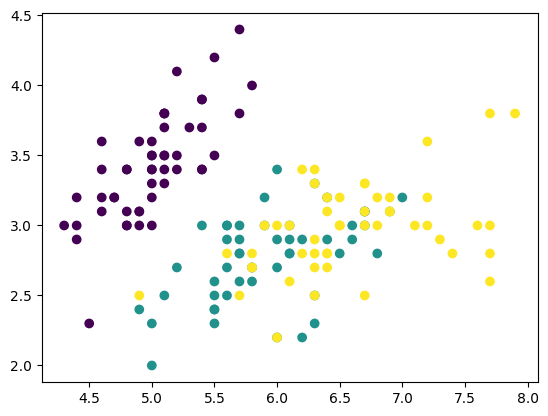

In [4]:
iris=load_iris()
x=iris.data
y=iris.target
plt.scatter(x[:,0],x[:,1],c=y)

KFold consiste à mélanger le jeu de données et à le découper en k parties égales. Une des parties est le test set. les autres servent à l'entrainement. Cette technique est très bonne pour faire des régressions. 

In [17]:
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, GroupKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

cv=KFold(5)
cross_val_score(KNeighborsClassifier(),x,y,cv=cv)

array([1.        , 1.        , 0.83333333, 0.93333333, 0.8       ])

LeaveOneOut, consiste à ne garder qu'un seul individu pour le test et de faire l'entrainement sur tout le reste des individus. Cette méthode est extrêmement gourmande en puissance de calcul. A n'utiliser que sur un petit dataset.

In [9]:
cv=LeaveOneOut()
cross_val_score(KNeighborsClassifier(),x,y,cv=cv)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Le ShuffleSplit consiste à garder une portion des individus pour le test. Définir un taux d'entrainement/validation. Faire la manipulation, mélanger et recommancer avec le même taux. Comme pour le KFold, si les classes sont deséquilibrées, cela ne fonctionne pas bien. 

In [12]:
cv=ShuffleSplit(4,test_size=0.2)
cross_val_score(KNeighborsClassifier(),x,y,cv=cv)

array([0.96666667, 1.        , 0.9       , 0.96666667])

StratifiedKFold respecte les proportions des différentes classes pour le découpage du trainset.

In [15]:
cv=StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(),x,y,cv=cv)

array([0.97368421, 0.94736842, 0.94594595, 1.        ])

GroupKFold à revoir pour l'explication mais considère des familles (ex. du facteur génétique pour le cancer).

In [19]:
cv=GroupKFold(5).get_n_splits(x,y,groups=x[:,0])
cross_val_score(KNeighborsClassifier(),x,y,cv=cv)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])